## Linear Regression - Single Variable - Exrecise

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [9]:
df = pd.read_csv("D:\\Data Science\\datasets\\ML\\canada_per_capita_income.csv")
df.head(10)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [10]:
df.rename(columns={'per capita income (US$)':'income'},inplace=True)
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


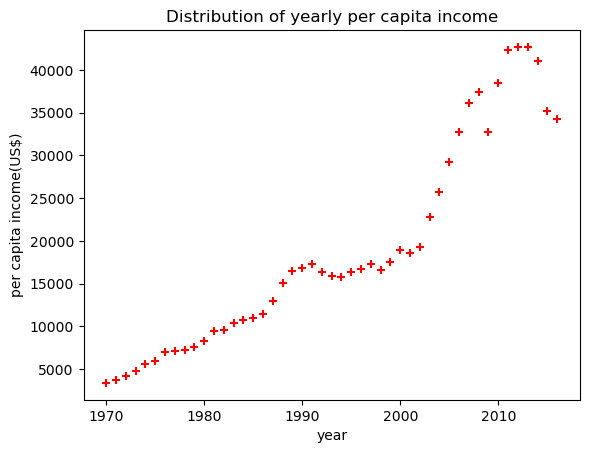

In [15]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income(US$)')
plt.title("Distribution of yearly per capita income")
plt.scatter(df.year,df.income,color="red",marker="+")

searching for outliers

In [34]:
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = df[(df['income']<lower_bound) | (df['income']>upper_bound)]
print("Outliers : ",outliers['income'])

Outliers :  Series([], Name: income, dtype: float64)


There is no outliers

In [35]:
reg = linear_model.LinearRegression()
reg.fit(df[['year']],df['income'])

LinearRegression()

In [36]:
year_df = pd.DataFrame({'year': [2020]})

In [38]:
predicted_income = reg.predict(year_df)
print("Predicted per capita income in 2020 : ",predicted_income[0].round(2),"$")

Predicted per capita income in 2020 :  41288.69 $


we can ensure the result by calculating the coefficient and intercept values.

In [41]:
coefficient = reg.coef_
print("coefficient : ",coefficient[0])

coefficient :  828.4650752227104


In [43]:
intercept = reg.intercept_
print("Intercept : ",intercept)

Intercept :  -1632210.7578554575


In [44]:
expected_income = coefficient*2020 + intercept
expected_income

array([41288.69409442])

That concludes that we get the same value as we use the equation here.

Further more we can predict the per capita income for the year 2024.

In [45]:
year_df = pd.DataFrame({'year':[2024]})

In [46]:
predicted_income = reg.predict(year_df)
print("Predicted per capita income for the year 2024 : ",predicted_income[0].round(2),"$")

Predicted per capita income for the year 2024 :  44602.55 $


In [50]:
year_df = df.drop(columns='income',)
year_df.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [58]:
df['predicted_income'] = reg.predict(df[['year']])
df.head()

,year,income,predicted_price,predicted_income
0,1970,3399.299037,-134.559667,-134.559667
1,1971,3768.297935,693.905409,693.905409
2,1972,4251.175484,1522.370484,1522.370484
3,1973,4804.463248,2350.835559,2350.835559
4,1974,5576.514583,3179.300634,3179.300634


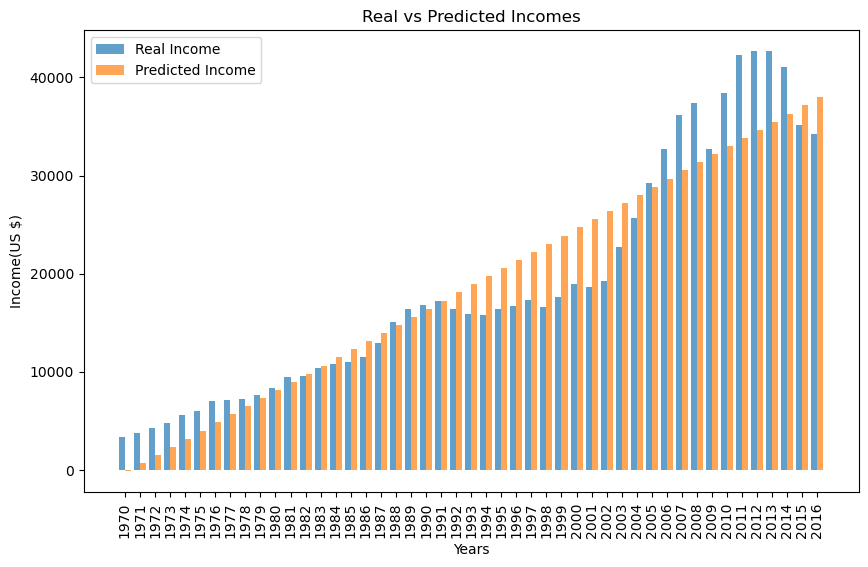

In [66]:
plt.figure(figsize=(10, 6))

bar_width = 0.4
index = np.arange(len(df))

plt.bar(index, df['income'], bar_width, label='Real Income', alpha=0.7)
plt.bar(index + bar_width, df['predicted_income'], bar_width, label='Predicted Income', alpha=0.7)

plt.xlabel('Years')
plt.ylabel('Income(US $)')
plt.title('Real vs Predicted Incomes')
plt.xticks(index + bar_width / 2, df['year'],rotation=90)
plt.legend()
plt.show()